In [ ]:
!pip install --upgrade vnstock
!pip install pymannkendall
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 16.9 MB/s eta 0:00:00


# **Cổ phiếu SSI**

In [ ]:
from vnstock import Vnstock

#Giá lịch sử của SSI:
SSI = Vnstock().stock(symbol = 'SSI', source = 'TCBS')
dfSSI = SSI.quote.history(start = '2020-01-01', end = '2025-01-01', interval='1D').fillna(0)

#Set cột Time thành index, loại bỏ giá trị trùng:
dfSSI['time'] = pd.to_datetime(dfSSI['time'])
dfSSI = dfSSI.set_index('time').drop_duplicates(keep='first')
df = dfSSI.asfreq('D').fillna(0)

#Tính moving average của SSI với window = 5:
dfSSI['SSI_MA_5'] = dfSSI['close'].rolling(window = 5).mean().fillna(0)

#Cột thể hiện giá hôm trước của SSI:
dfSSI['SSI_Price_lag'] = dfSSI['close'].shift(1).fillna(0)

#Tính giá trung bình tích luỹ của SSI:
dfSSI['SSI_Expanding_mean'] = dfSSI['close'].expanding().mean().fillna(0)

#Tính simple return của SSI:
dfSSI['SSI_Simple_return'] = dfSSI['close'].pct_change().fillna(0)

#Tính log return của SSI:
dfSSI['SSI_Log_return'] = np.log(dfSSI['close']/dfSSI['close'].shift(1)).fillna(0)

2025-08-12 09:18:33 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
INFO:vnstock.common.data.data_explorer:TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.


In [ ]:
dfSSI

,open,high,low,close,volume,SSI_MA_5,SSI_Price_lag,SSI_Expanding_mean,SSI_Simple_return,SSI_Log_return
time,,,,,,,,,,
2020-01-06,6.71,6.76,6.67,6.73,1348120,0.000,0.00,6.730000,0.000000,0.000000
2020-01-07,6.73,6.76,6.71,6.75,643090,0.000,6.73,6.740000,0.002972,0.002967
2020-01-08,6.67,6.69,6.49,6.56,2622960,0.000,6.75,6.680000,-0.028148,-0.028552
2020-01-09,6.64,6.67,6.60,6.64,1149130,0.000,6.56,6.670000,0.012195,0.012121
2020-01-10,6.65,6.78,6.62,6.76,2067400,6.688,6.64,6.688000,0.018072,0.017911
...,...,...,...,...,...,...,...,...,...,...
2024-12-25,26.00,26.75,25.90,26.55,26237763,26.160,25.95,19.519405,0.023121,0.022858
2024-12-26,26.50,26.60,26.35,26.35,8770905,26.190,26.55,19.524892,-0.007533,-0.007561
2024-12-27,26.40,26.70,26.30,26.60,16356516,26.260,26.35,19.530570,0.009488,0.009443


In [ ]:
#Chỉ số Tài chính của SSI:

from vnstock import Finance

SSIratio = Finance(symbol = 'SSI', source = 'TCBS')
SSI_Finance = SSIratio.ratio(period = 'year', lang='vi', dropna=True).fillna(0).head(5)

#Lấy những chỉ số Tài chính quan trọng của SSI:
SSI_ratio = SSI_Finance[['roe', 'roa', 'price_to_earning', 'earning_per_share']]

In [ ]:
SSI_ratio

,roe,roa,price_to_earning,earning_per_share
period,,,,
2024,0.114,0.040,18.1,1437
2023,0.101,0.038,22.0,1162
2022,0.093,0.033,15.3,866
2021,0.225,0.062,25.0,1798
2020,0.131,0.040,23.8,844


In [ ]:
#Outlier của cổ phiếu SSI

#IQR:
q1 =  dfSSI['SSI_Simple_return'].quantile(0.25)
q3 =  dfSSI['SSI_Simple_return'].quantile(0.75)
IQR = q3-q1

#Xác định ngưỡng trên & dưới:
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

#Đánh dấu outliers:
dfSSI['SSI_Outliers'] = ((dfSSI['SSI_Simple_return']<lower_bound)|(dfSSI['SSI_Simple_return']>upper_bound))
dfSSI['SSI_Lower'] = lower_bound
dfSSI['SSI_Upper'] = upper_bound

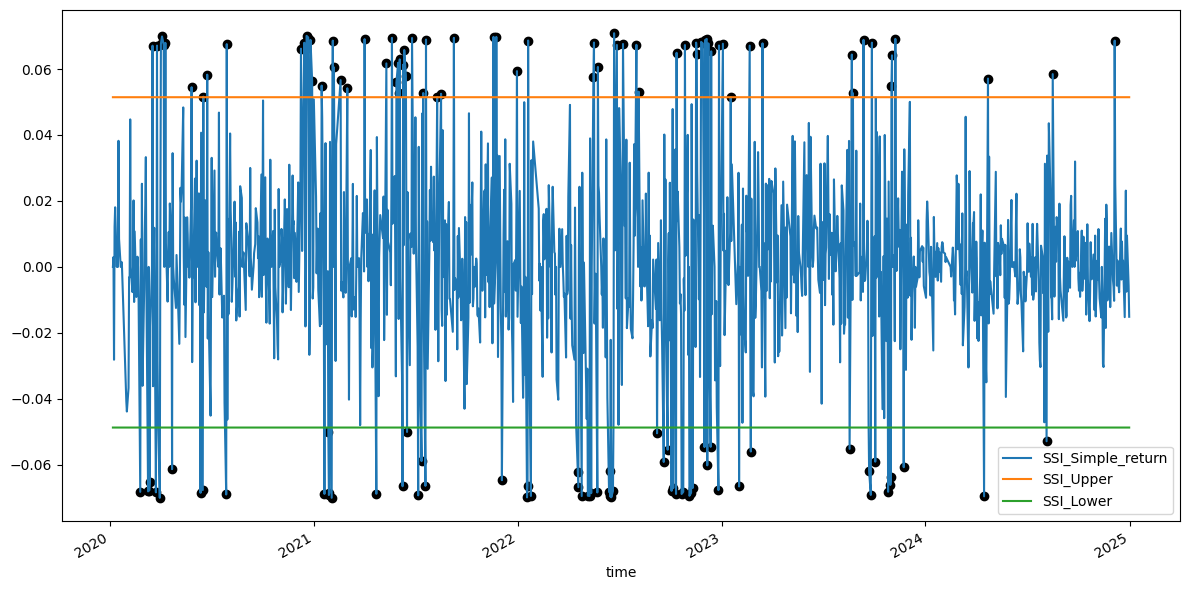

In [ ]:
#Vẽ biểu đồ:
fig, ax = plt.subplots(figsize = (12,6))
dfSSI[['SSI_Simple_return', 'SSI_Upper', 'SSI_Lower']].plot(ax=ax)

ax.scatter(
    dfSSI.loc[dfSSI['SSI_Outliers']].index,
    dfSSI.loc[dfSSI['SSI_Outliers'], 'SSI_Simple_return'],
    color = 'black',
    label = 'Outliers'
)
plt.tight_layout()
plt.show()

In [ ]:
#Phát hiện xu hướng bằng phương pháp Mann-Kendall

import pymannkendall as mk

SSI_Close_price = dfSSI['close'].dropna().reset_index(drop = True)

#Kiểm định MK:
SSI_result = mk.original_test(SSI_Close_price)

if SSI_result.p < 0.05:
  print(f'Có xu hướng đáng kể về mặt thống kê')
else:
  print(f'Không có xu hướng rõ ràng')

Có xu hướng đáng kể về mặt thống kê


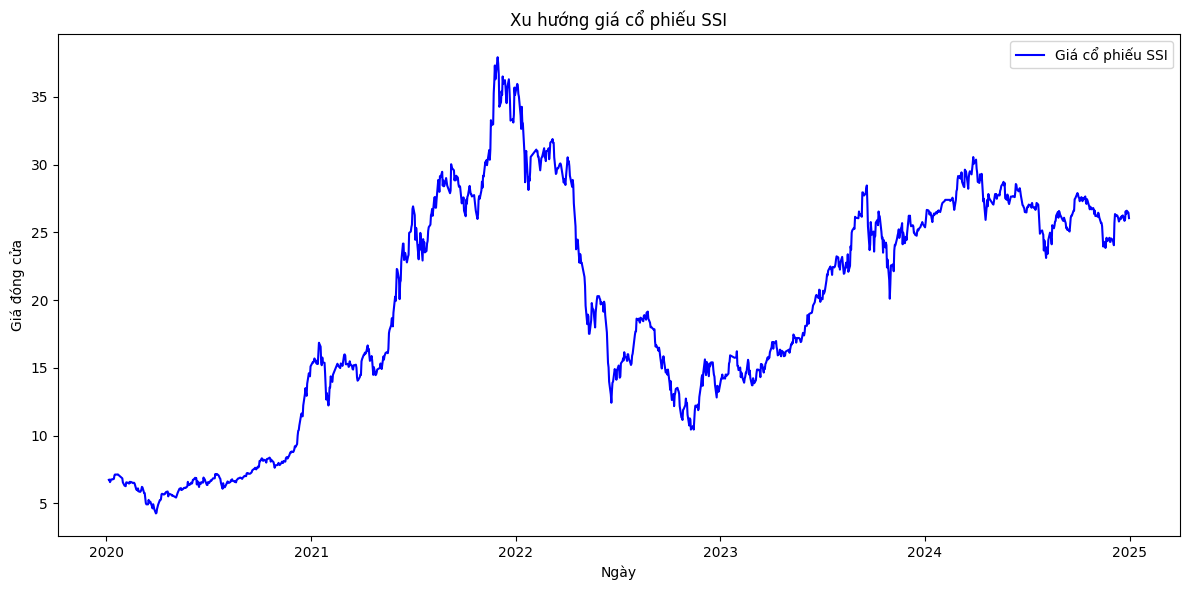

In [ ]:
#Trực quan hóa giá đóng cửa CP SSI theo thời gian:
plt.figure(figsize = (12,6))
plt.plot(dfSSI.index, dfSSI['close'], label = 'Giá cổ phiếu SSI', color = 'blue')
plt.title('Xu hướng giá cổ phiếu SSI')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Lợi suất cổ phiếu SSI'}, xlabel='time'>

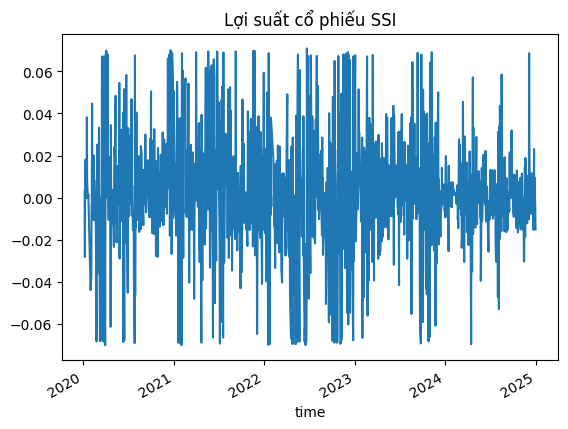

In [ ]:
#Mô phỏng  đường giá tương lai bằng Geometric Brownian Motion cho giá cổ phiếu SSI

#Tính toán lợi suất:
SSI_returns = dfSSI['close'].pct_change().dropna()
SSI_returns.plot(title = 'Lợi suất cổ phiếu SSI')

In [ ]:
#Tập huấn luyện:
SSI_train = SSI_returns.loc['2020']
SSI_test = SSI_returns.loc['2024']

#Tham số:
T = len(SSI_test)
N = len(SSI_test)
S_0 = float(dfSSI.loc[SSI_train.index[-1], 'close'])
N_SIMS = 100
mu = float(SSI_train.mean())
sigma = float(SSI_train.std())

In [ ]:
#Định nghĩa hàm GBM
def SSI_simulate_gbm(S_0, mu, sigma, N_SIMS, T, N, random_seed=42):
  np.random.seed(random_seed)
  dt = T/N
  dW = np.random.normal(scale = np.sqrt(dt), size = (N_SIMS, N))
  W = np.cumsum(dW, axis = 1)
  tỉme_step = np.linspace(dt, T, N)
  time_steps = np.broadcast_to(tỉme_step, (N_SIMS, N))
  S_t = S_0*np.exp((mu-0.5*sigma**2)*time_steps+sigma*dW)
  S_t = np.insert(S_t, 0, S_0, axis = 1)
  return S_t

#Chạy mô phỏng GBM:
SSI_simulations = SSI_simulate_gbm(S_0, mu, sigma, N_SIMS, T, N)

#Tạo index:
SSI_simulation_index = pd.date_range(
    start = SSI_train.index[-1], periods = N+1, freq = 'B')

#Chuyển kết quả về DF
SSI_sim_df = pd.DataFrame(
    data = np.transpose(SSI_simulations),
    index = SSI_simulation_index)

#Tổng hợp & join kết quả thực tế:
res_df = SSI_sim_df.mean(axis = 1).to_frame()
res_df = res_df.join(dfSSI['close'], how = 'left')
res_df.columns = ['simulation_average', 'adj_close_price']

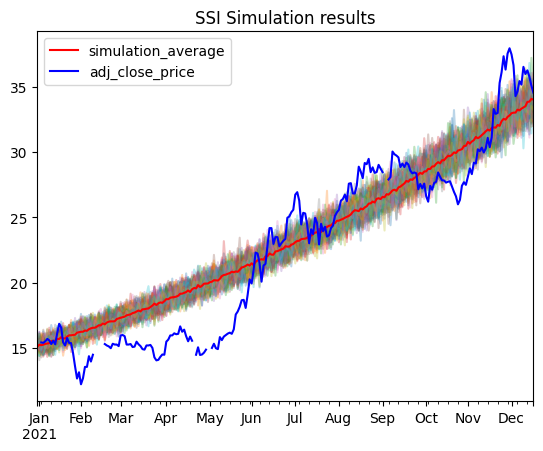

In [ ]:
#Trực quan hóa:
ax = SSI_sim_df.plot(
    alpha = 0.3,
    legend = False,
    title = 'SSI Simulation results')

res_df.plot(ax = ax, color = ['red', 'blue'])
plt.show()

# **Cổ phiếu VND**

In [ ]:
#Giá lịch sử của VND:
VND = Vnstock().stock(symbol = 'VND', source = 'TCBS')
dfVND = VND.quote.history(start = '2020-01-01', end = '2025-01-01', interval='1D').fillna(0)

#Set cột Time thành index, loại bỏ giá trị trùng:
dfVND['time'] = pd.to_datetime(dfVND['time'])
dfVND = dfVND.set_index('time').drop_duplicates(keep='first')
df = dfVND.asfreq('D').fillna(0)

#Tính moving average của VND với window = 5:
dfVND['VND_MA_5'] = dfVND['close'].rolling(window = 5).mean().fillna(0)

#Cột thể hiện giá hôm trước của VND:
dfVND['VND_Price_lag'] = dfVND['close'].shift(1).fillna(0)

#Tính giá trung bình tích luỹ của VND:
dfVND['VND_Expanding_mean'] = dfVND['close'].expanding().mean().fillna(0)

#Tính simple return của VND:
dfVND['VND_Simple_return'] = dfVND['close'].pct_change().fillna(0)

#Tính log return của VND:
dfVND['VND_Log_return'] = np.log(dfVND['close']/dfVND['close'].shift(1)).fillna(0)

2025-08-12 08:23:17 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.
INFO:vnstock.common.data.data_explorer:TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.



📋 Kết nối tài khoản Google Drive để lưu các thiết lập của dự án.
Dữ liệu phiên làm việc với Colab của bạn sẽ bị xóa nếu không lưu trữ vào Google Drive.



In [ ]:
dfVND

,open,high,low,close,volume,VND_MA_5,VND_Price_lag,VND_Expanding_mean,VND_Simple_return,VND_Log_return
time,,,,,,,,,,
2020-01-06,2.76,2.80,2.74,2.78,149130,0.000,0.00,2.780000,0.000000,0.000000
2020-01-07,2.78,2.78,2.74,2.78,68060,0.000,2.78,2.780000,0.000000,0.000000
2020-01-08,2.74,2.75,2.68,2.74,233880,0.000,2.78,2.766667,-0.014388,-0.014493
2020-01-09,2.74,2.77,2.74,2.77,92680,0.000,2.74,2.767500,0.010949,0.010889
2020-01-10,2.77,2.78,2.76,2.78,89810,2.770,2.77,2.770000,0.003610,0.003604
...,...,...,...,...,...,...,...,...,...,...
2024-12-25,12.41,12.80,12.41,12.60,8987282,12.446,12.36,13.097706,0.019417,0.019231
2024-12-26,12.70,12.75,12.50,12.55,4829680,12.446,12.60,13.097264,-0.003968,-0.003976
2024-12-27,12.55,12.60,12.41,12.46,5237516,12.476,12.55,13.096750,-0.007171,-0.007197


In [ ]:
#Chỉ số Tài chính của VND:
VNDratio = Finance(symbol = 'VND', source = 'TCBS')
VND_Finance = VNDratio.ratio(period = 'year', lang='vi', dropna=True).fillna(0).head(5)

#Lấy những chỉ số Tài chính quan trọng của VND:
VND_ratio = VND_Finance[['roe', 'roa', 'price_to_earning', 'earning_per_share']]

In [ ]:
VND_ratio

,roe,roa,price_to_earning,earning_per_share
period,,,,
2024,0.095,0.040,10.8,1128
2023,0.130,0.050,13.8,1328
2022,0.100,0.032,14.3,801
2021,0.349,0.092,16.7,1956
2020,0.196,0.052,12.9,568


In [ ]:
#Outlier của cổ phiếu SSI

#IQR:
q1 =  dfVND['VND_Simple_return'].quantile(0.25)
q3 =  dfVND['VND_Simple_return'].quantile(0.75)
IQR = q3-q1

#Xác định ngưỡng trên & dưới:
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

#Đánh dấu outliers:
dfVND['VND_Outliers'] = ((dfVND['VND_Simple_return']<lower_bound)|(dfVND['VND_Simple_return']>upper_bound))
dfVND['VND_Lower'] = lower_bound
dfVND['VND_Upper'] = upper_bound

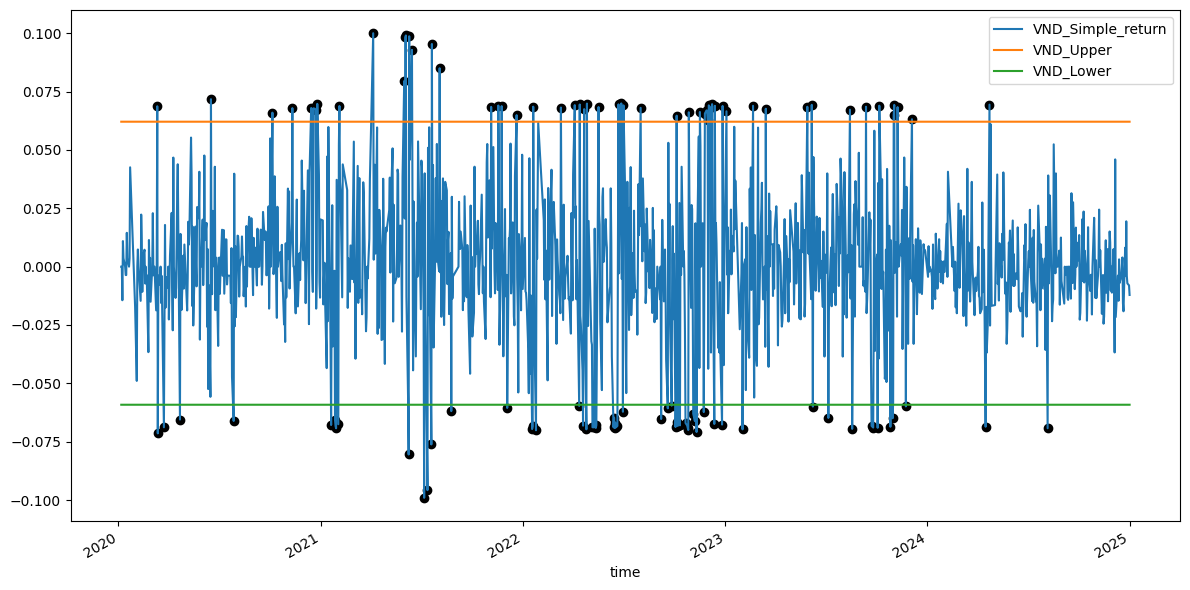

In [ ]:
#Vẽ biểu đồ:
fig, ax = plt.subplots(figsize = (12,6))
dfVND[['VND_Simple_return', 'VND_Upper', 'VND_Lower']].plot(ax=ax)

ax.scatter(
    dfVND.loc[dfVND['VND_Outliers']].index,
    dfVND.loc[dfVND['VND_Outliers'], 'VND_Simple_return'],
    color = 'black',
    label = 'Outliers'
)
plt.tight_layout()
plt.show()

In [ ]:
VND_Close_price = dfVND['close'].dropna().reset_index(drop = True)

#Kiểm định MK:
VND_result = mk.original_test(VND_Close_price)

if VND_result.p < 0.05:
  print(f'Có xu hướng đáng kể về mặt thống kê')
else:
  print(f'Không có xu hướng rõ ràng')

Có xu hướng đáng kể về mặt thống kê


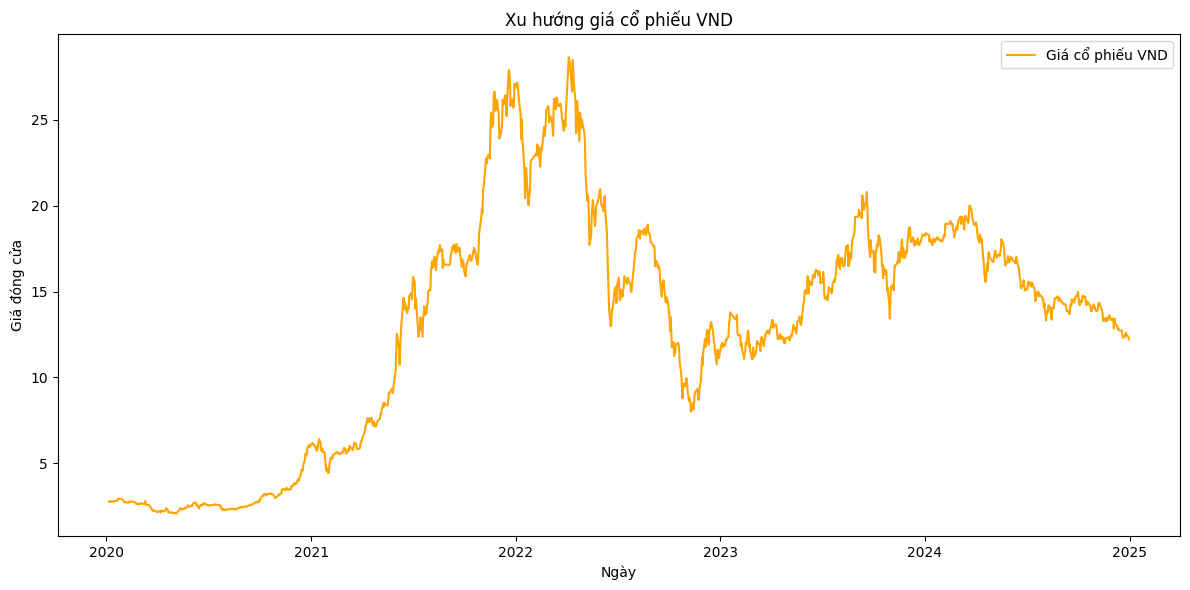

In [ ]:
#Trực quan hóa giá đóng cửa CP VND theo thời gian:
plt.figure(figsize = (12,6))
plt.plot(dfVND.index, dfVND['close'], label = 'Giá cổ phiếu VND', color = 'orange')
plt.title('Xu hướng giá cổ phiếu VND')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.legend()
plt.tight_layout()
plt.show()

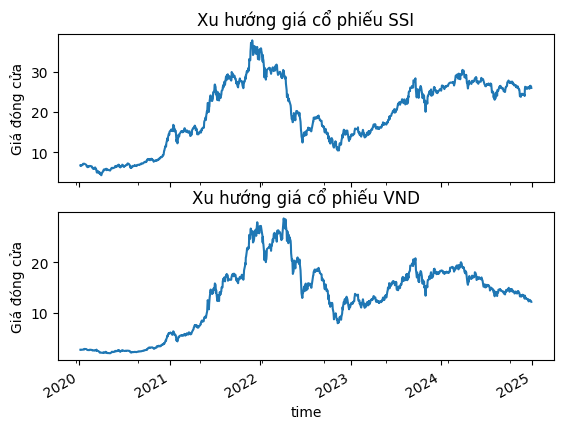

In [ ]:
#Vẽ biểu đồ kết hợp để dễ quan sát:
fig, ax = plt.subplots(2,1, sharex = True)

dfSSI['close'].plot(ax=ax[0])
ax[0].set(
    title = 'Xu hướng giá cổ phiếu SSI',
    ylabel = 'Giá đóng cửa'
)

dfVND['close'].plot(ax=ax[1])
ax[1].set(
    title = 'Xu hướng giá cổ phiếu VND',
    ylabel = 'Giá đóng cửa'
)

plt.show()

<Axes: title={'center': 'Lợi suất cổ phiếu VND'}, xlabel='time'>

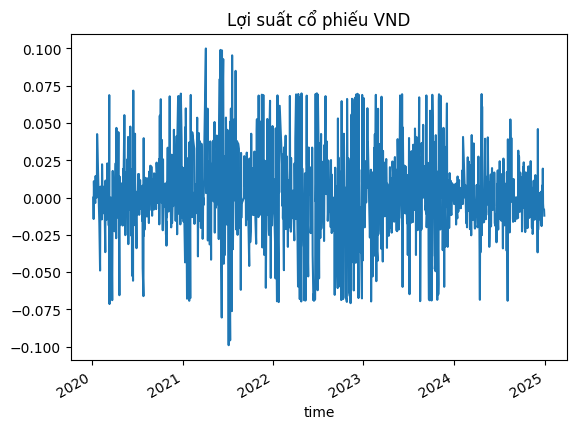

In [ ]:
#Mô phỏng  đường giá tương lai bằng Geometric Brownian Motion cho giá cổ phiếu VND

#Tính toán lợi suất:
VND_returns = dfVND['close'].pct_change().dropna()
VND_returns.plot(title = 'Lợi suất cổ phiếu VND')

In [ ]:
#Tập huấn luyện:
VND_train = VND_returns.loc['2020']
VND_test = VND_returns.loc['2024']

#Tham số:
T = len(VND_test)
N = len(VND_test)
S_0 = float(dfVND.loc[VND_train.index[-1], 'close'])
N_SIMS = 100
mu = float(VND_train.mean())
sigma = float(VND_train.std())

In [ ]:
#Định nghĩa hàm GBM
def VND_simulate_gbm(S_0, mu, sigma, N_SIMS, T, N, random_seed=42):
  np.random.seed(random_seed)
  dt = T/N
  dW = np.random.normal(scale = np.sqrt(dt), size = (N_SIMS, N))
  W = np.cumsum(dW, axis = 1)
  tỉme_step = np.linspace(dt, T, N)
  time_steps = np.broadcast_to(tỉme_step, (N_SIMS, N))
  S_t = S_0*np.exp((mu-0.5*sigma**2)*time_steps+sigma*dW)
  S_t = np.insert(S_t, 0, S_0, axis = 1)
  return S_t

#Chạy mô phỏng GBM:
VND_simulations = VND_simulate_gbm(S_0, mu, sigma, N_SIMS, T, N)

#Tạo index:
VND_simulation_index = pd.date_range(
    start = VND_train.index[-1], periods = N+1, freq = 'B')

#Chuyển kết quả về DF
VND_sim_df = pd.DataFrame(
    data = np.transpose(VND_simulations),
    index = VND_simulation_index)

#Tổng hợp & join kết quả thực tế:
res_df = VND_sim_df.mean(axis = 1).to_frame()
res_df = res_df.join(dfVND['close'], how = 'left')
res_df.columns = ['simulation_average', 'adj_close_price']

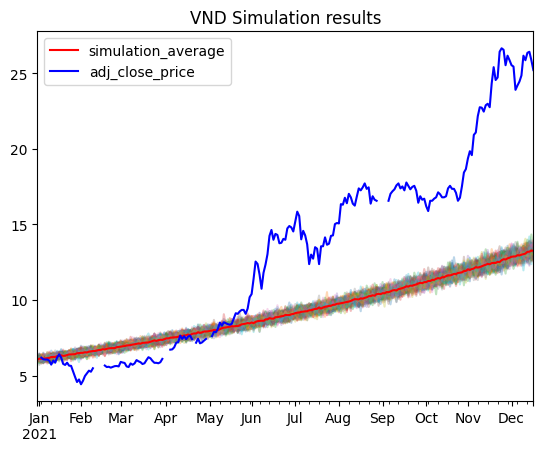

In [ ]:
#Trực quan hóa:
ax = VND_sim_df.plot(
    alpha = 0.3,
    legend = False,
    title = 'VND Simulation results')

res_df.plot(ax = ax, color = ['red', 'blue'])
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
#Ước tính VAR bằng Monte Carlo

#Tham số:
assets = ['SSI', 'VND']
shares = np.array([5, 5], dtype=float)
start_date = '2020-01-01'
end_date ='2025-01-01'
T = 1
N_SIMS = 10**5

<Axes: title={'center': 'Lợi suất cổ phiếu SSI & VND'}, xlabel='time'>

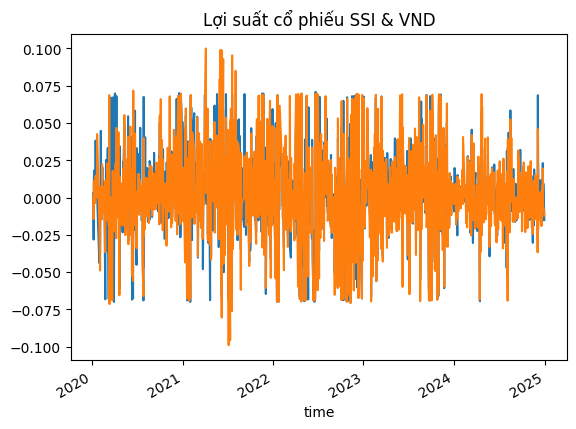

In [ ]:
#Vẽ biểu đồ lợi suất của 2 cổ phiếu:
SSI_returns.plot(title = 'Lợi suất cổ phiếu SSI')
VND_returns.plot(title = 'Lợi suất cổ phiếu SSI & VND')

In [ ]:
#Ma trận hiệp phương sai giữa 2 cổ phiếu:
returns_df = pd.concat([SSI_returns, VND_returns], axis=1)
returns_df.columns = ['SSI', 'VND']
cov_matrix = returns_df.cov()

#Thực hiện phân rã Cholesky của ma trận hiệp phương sai:
chol_mat = np.linalg.cholesky(cov_matrix)

#Sinh các biến ngẫu nhiên chuẩn và biến đổi để có tương quan:
assets = ['SSI', 'VND']
rv =np.random.normal(size = (N_SIMS, len(assets)))
correlated_rv = np.transpose(
    np.matmul(chol_mat, np.transpose(rv)))

In [ ]:
#Tính VAR

#Tham số:
r = np.mean(returns_df, axis = 0).values
sigma = np.std(returns_df, axis = 0).values
S_0 = df['close'].values[-1]
P_0 = np.sum(shares*S_0)


S_T = S_0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*correlated_rv)
P_T = np.sum(shares*S_T, axis = 1)
P_diff = P_T - P_0

#VAR
P_diff_sorted = np.sort(P_diff)
percentile = [0.01, 0.1, 0]
var = np.percentile(P_diff_sorted, percentile)
for x, y in zip(percentile, var):
  print(f'1-day VAR with {100-x}% confidence: ${-y : .2f}')

1-day VAR with 99.99% confidence: $ 0.22
1-day VAR with 99.9% confidence: $ 0.16
1-day VAR with 100% confidence: $ 0.32




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



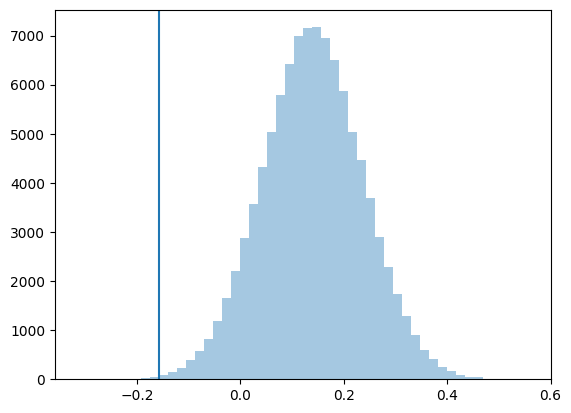

In [ ]:
#Trực quan hóa kết quả:
ax = sns.distplot(P_diff, kde = False)
ax.set_title = ('1-Day 99% VAR Distribution')
ax.axvline(var[1], 0, 10000)

plt.show()

In [ ]:
#Phân bổ tài sản bằng chiến lược phân bổ đều:
!pip install quantstats
import quantstats as qs

In [ ]:
n_assets = len(assets)
#Định nghĩa trọng số cho chiến lược 1/n
portfolio_weights = [1/n_assets]*n_assets

#Lợi suất hàng ngày của danh mục
portfolio_returns = pd.Series(
    np.dot(portfolio_weights, returns_df.T),
    index = returns_df.index)

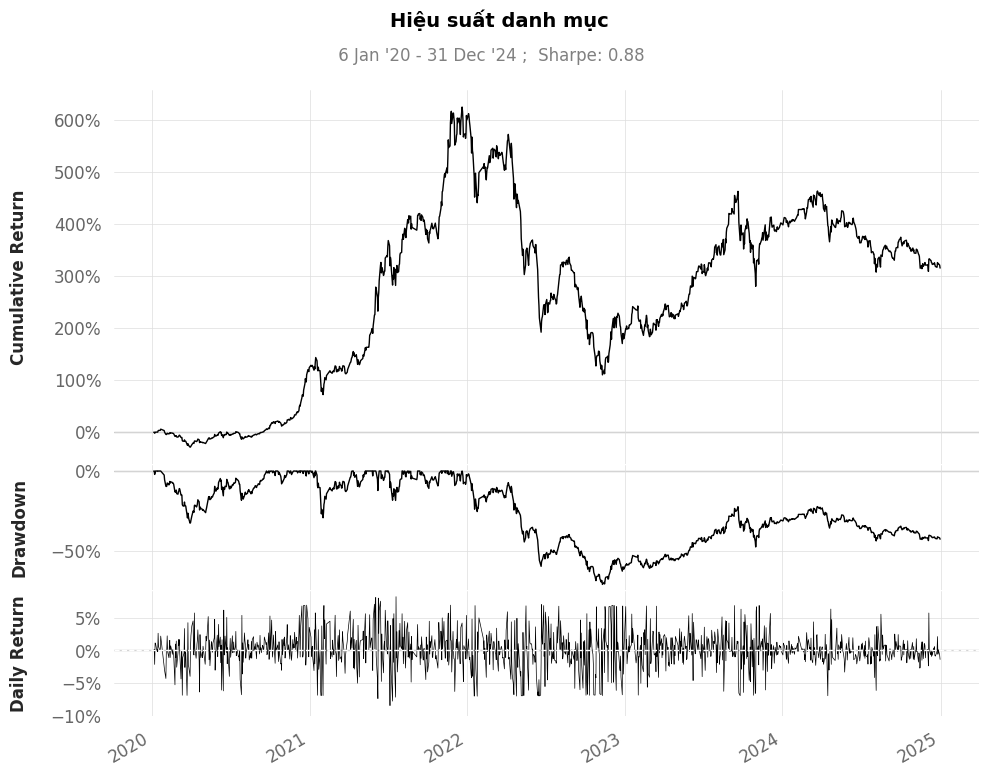

                     Benchmark (SPY)    Strategy
-------------------  -----------------  ----------
Start Period         2020-01-07         2020-01-07
End Period           2024-12-31         2024-12-31
Risk-Free Rate       0.0%               0.0%
Time in Market       97.0%              99.0%

Cumulative Return    95.88%             314.76%
CAGR﹪               14.63%             33.49%

Sharpe               0.75               0.88
Prob. Sharpe Ratio   95.01%             97.43%
Sortino              1.06               1.29
Sortino/√2           0.75               0.91
Omega                1.17               1.17

Max Drawdown         -33.72%            -71.0%
Max DD Date          2020-03-23         2022-11-10
Max DD Period Start  2020-02-20         2021-12-21
Max DD Period End    2020-08-07         2024-12-31
Longest DD Days      707                1107

Gain/Pain Ratio      0.16               0.17
Gain/Pain (1M)       0.85               0.71

Payoff Ratio         0.78               1.07
P

In [ ]:
#Tạo biểu đồ tổng quan:
qs.plots.snapshot(
    portfolio_returns,
    title = 'Hiệu suất danh mục',
    grayscale = True)

#Tính các chỉ số đánh giá hiệu suất so với benchmark:
qs.reports.metrics(
    portfolio_returns,
    benchmark = 'SPY',
    title = 'Hiệu suất danh mục so với SPY',
    made = 'basic',
    prepare_returns = False)

In [ ]:
#Phân bổ tài sản bằng chiến lược Hierarchial Risk Parity

#Import thư viện
!pip install PyPortfolioOpt
from pypfopt.expected_returns import returns_from_prices
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt.discrete_allocation import(DiscreteAllocation, get_latest_prices)
from pypfopt import plotting

In [ ]:
#Phân bổ tối ưu:
hrp = HRPOpt(returns = returns_df)
hrp.optimize()

#Trọng số:
weights = hrp.clean_weights()
print(weights)

#Tính toán & hiển thị hiệu suất danh mục:
hrp.portfolio_performance(
    verbose = True,
    risk_free_rate = 0)

OrderedDict([('SSI', 0.53931), ('VND', 0.46069)])
Expected annual return: 39.0%
Annual volatility: 43.6%
Sharpe Ratio: 0.90


(np.float64(0.3903027106950998),
 np.float64(0.4359639834540863),
 np.float64(0.8952636582563125))

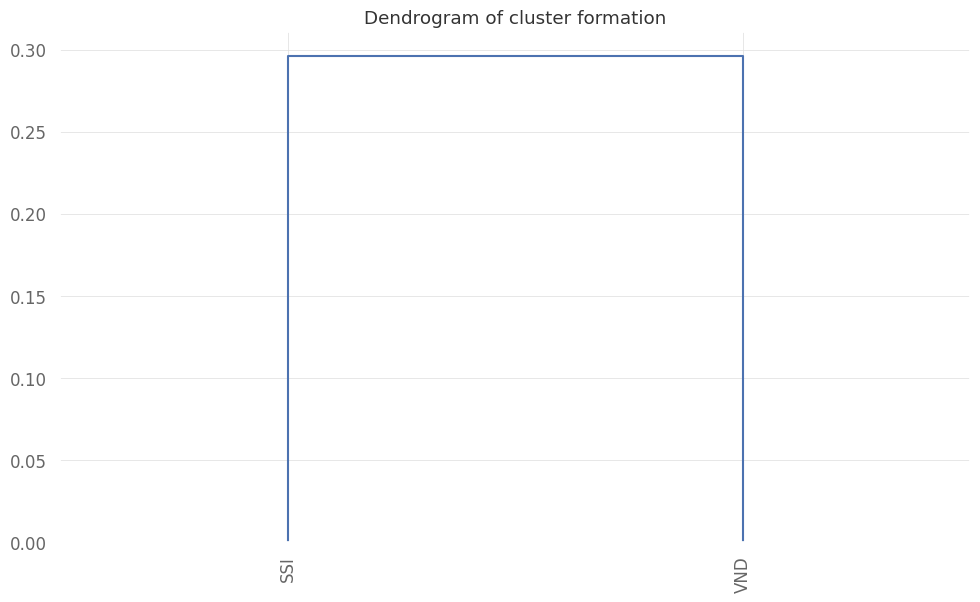

In [ ]:
#Trực quan hóa:
fig, ax = plt.subplots()

#Dendrogram:
plotting.plot_dendrogram(hrp, ax= ax)
ax.set_title('Dendrogram of cluster formation')
plt.show()

In [ ]:
#Lấy cột giá của 2 cổ phiếu
stock_prices_df = pd.concat([dfSSI['close'], dfVND['close']], axis=1)
stock_prices_df

#Lấy giá mới nhất:
price_df = stock_prices_df
latest_prices = get_latest_prices(price_df)

#Khởi tạo công cụ phân bổ lô lẻ:
allocation_finder = DiscreteAllocation(
    weights,
    latest_prices,
    total_portfolio_value = 10000000)

#Tính phân bổ tối ưu:
allocation, leftover = allocation_finder.lp_portfolio()
print(allocation)
print(leftover)

{'SSI': 207029, 'VND': 377305}
0.49981179647147655
